In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('DataScience_salaries_2025.csv')

print("Shape:", df.shape)
df.head()

Shape: (93597, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Research Scientist,208000,USD,208000,US,0,US,M
1,2025,MI,FT,Research Scientist,147000,USD,147000,US,0,US,M
2,2025,SE,FT,Research Scientist,173000,USD,173000,US,0,US,M
3,2025,SE,FT,Research Scientist,117000,USD,117000,US,0,US,M
4,2025,MI,FT,AI Engineer,100000,USD,100000,US,100,US,M


In [4]:
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')
print(df.columns)


Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [5]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93597 entries, 0 to 93596
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           93597 non-null  int64 
 1   experience_level    93597 non-null  object
 2   employment_type     93597 non-null  object
 3   job_title           93597 non-null  object
 4   salary              93597 non-null  int64 
 5   salary_currency     93597 non-null  object
 6   salary_in_usd       93597 non-null  int64 
 7   employee_residence  93597 non-null  object
 8   remote_ratio        93597 non-null  int64 
 9   company_location    93597 non-null  object
 10  company_size        93597 non-null  object
dtypes: int64(4), object(7)
memory usage: 7.9+ MB


,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [6]:
print("Salary USD range:", df['salary_in_usd'].min(), "-", df['salary_in_usd'].max())
print("\nUnique work years:", df['work_year'].unique())
print("\nExperience levels:", df['experience_level'].unique())
print("\nRemote ratios:", df['remote_ratio'].unique())


Salary USD range: 15000 - 800000

Unique work years: [2025 2024 2022 2023 2020 2021]

Experience levels: ['MI' 'SE' 'EN' 'EX']

Remote ratios: [  0 100  50]


In [7]:
df.rename(columns={
    'work_year': 'year',
    'experience_level': 'seniority_level',
    'employment_type': 'status'
}, inplace=True)


In [8]:
# Convert remote ratio numeric values to category labels
df['work_setting'] = df['remote_ratio'].map({
    0: 'On-site',
    50: 'Hybrid',
    100: 'Remote'
})


In [9]:
for col in ['job_title', 'seniority_level', 'status',
            'employee_residence', 'company_location', 'company_size']:
    df[col] = df[col].astype(str).str.strip().str.title()


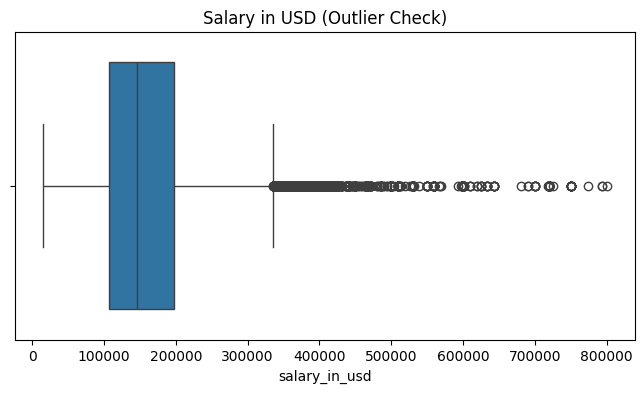

In [10]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['salary_in_usd'])
plt.title('Salary in USD (Outlier Check)')
plt.show()


In [11]:
df = df[df['salary_in_usd'] < 400000]


In [12]:
yearly_salary = df.groupby('year')['salary_in_usd'].mean().reset_index()
yearly_salary.columns = ['year', 'avg_salary_usd']
yearly_salary


,year,avg_salary_usd
0,2020,93244.041096
1,2021,96963.018519
2,2022,133833.009047
3,2023,153162.507166
4,2024,157157.539990
5,2025,151508.941134


/tmp/ipython-input-2829098791.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='year', y='salary_in_usd', estimator='mean', ci=None, marker='o')


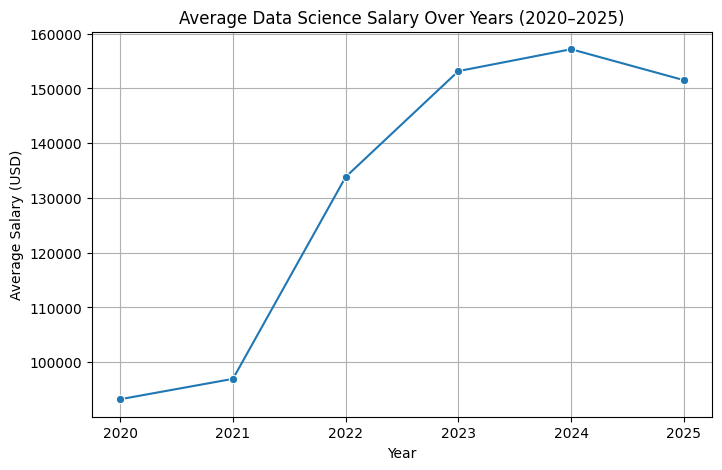

In [13]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='year', y='salary_in_usd', estimator='mean', ci=None, marker='o')
plt.title('Average Data Science Salary Over Years (2020–2025)')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.grid(True)
plt.show()


Expect to see a steady upward trend in salaries — reflecting global growth in demand for Data Science roles.
If you observe dips (like 2020–2021), they may correspond to pandemic-related hiring slowdowns.

In [14]:
df.groupby('year')['salary_in_usd'].agg(['mean', 'median', 'count'])


,mean,median,count
year,,,
2020,93244.041096,79833.0,73
2021,96963.018519,82636.0,216
2022,133833.009047,131300.0,1658
2023,153162.507166,145000.0,8512
2024,157157.539990,148000.0,61766
2025,151508.941134,143000.0,20640


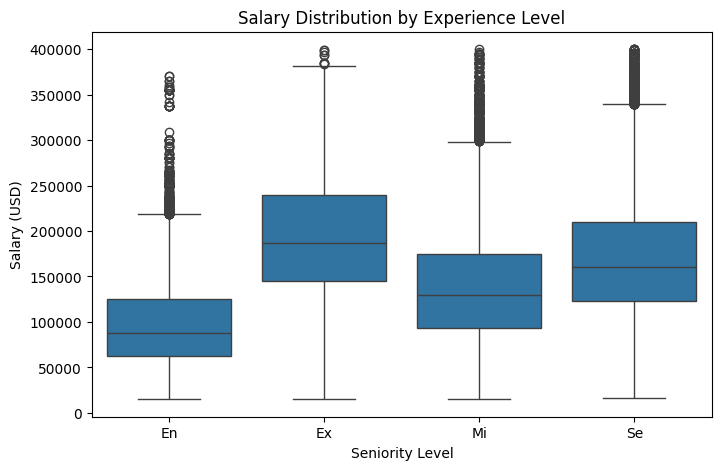

In [15]:
#salary by experience
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='seniority_level', y='salary_in_usd', order=sorted(df['seniority_level'].unique()))
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Seniority Level')
plt.ylabel('Salary (USD)')
plt.show()


You’ll likely see salaries increase with experience —
from Junior → Mid → Senior → Executive, showing the typical skill-to-compensation progression.

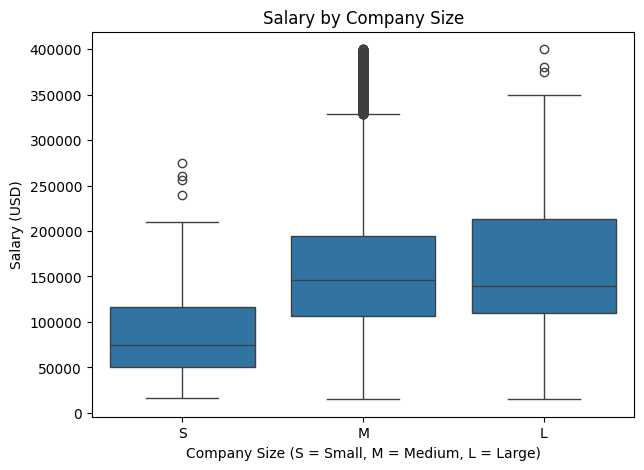

In [16]:
#salary by company size
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='company_size', y='salary_in_usd', order=['S', 'M', 'L'])
plt.title('Salary by Company Size')
plt.xlabel('Company Size (S = Small, M = Medium, L = Large)')
plt.ylabel('Salary (USD)')
plt.show()


Large companies (L) often offer higher pay, but mid-size companies may have more variance due to startups or specialized roles.

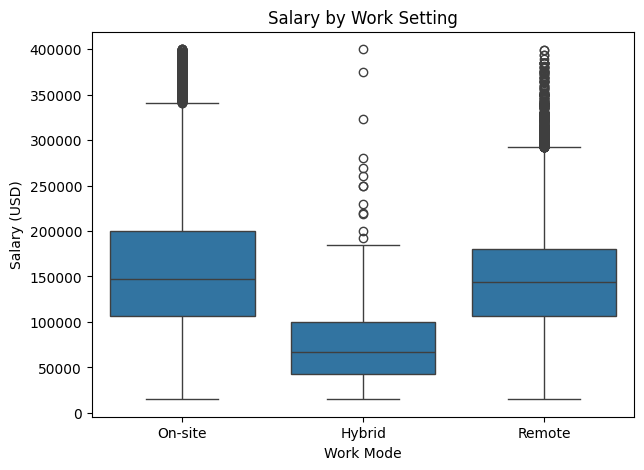

In [17]:
#salary by work setting
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='work_setting', y='salary_in_usd', order=['On-site', 'Hybrid', 'Remote'])
plt.title('Salary by Work Setting')
plt.xlabel('Work Mode')
plt.ylabel('Salary (USD)')
plt.show()


Remote roles often pay more — especially after 2021 — reflecting global hiring flexibility and demand for remote talent.

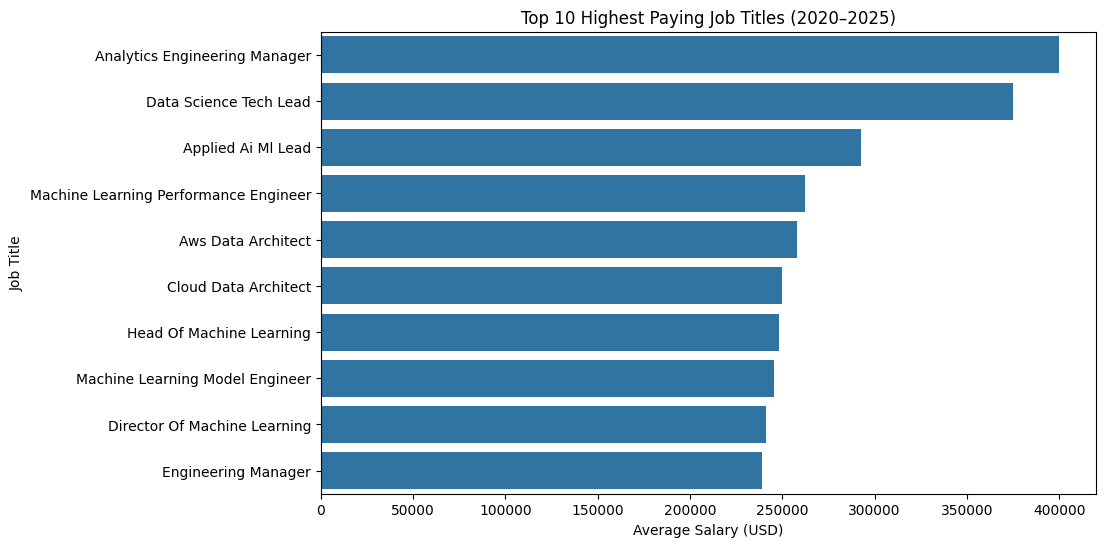

In [18]:
#top 10 highest paying roles
plt.figure(figsize=(10,6))
top_jobs = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_jobs.values, y=top_jobs.index)
plt.title('Top 10 Highest Paying Job Titles (2020–2025)')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.show()


Roles like Machine Learning Engineer, AI Engineer, and Data Architect will likely top the list, with Data Analysts at the lower end.

/tmp/ipython-input-4201901537.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_country.index, y=avg_salary_country.values, palette='viridis')


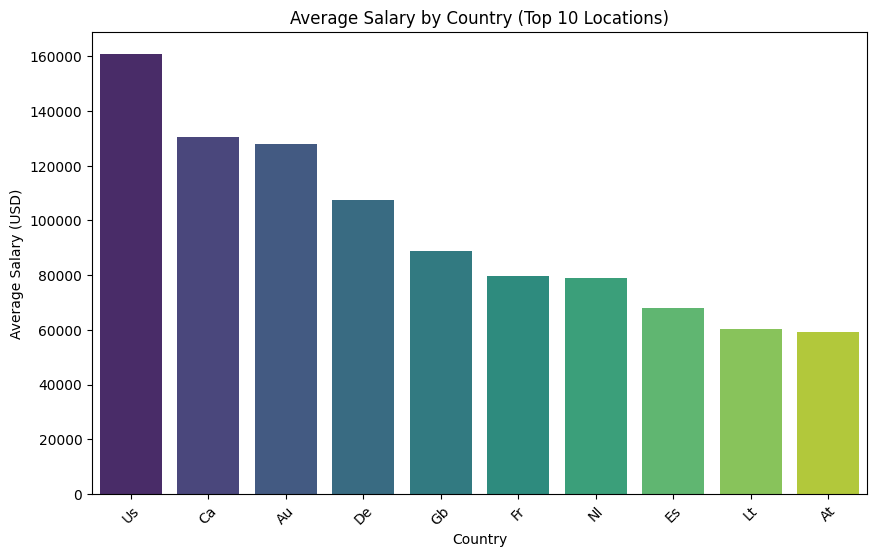

In [20]:
plt.figure(figsize=(10,6))
avg_salary_country = df[df['employee_residence'].isin(top_countries)] \
                        .groupby('employee_residence')['salary_in_usd'] \
                        .mean().sort_values(ascending=False)

sns.barplot(x=avg_salary_country.index, y=avg_salary_country.values, palette='viridis')
plt.title('Average Salary by Country (Top 10 Locations)')
plt.xlabel('Country')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.show()


Expect the US, UK, Canada, and Germany to lead in salaries, while developing regions might show lower averages due to cost-of-living differences.

/tmp/ipython-input-414511790.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='year', y='remote_ratio', estimator='mean', ci=None, marker='o')


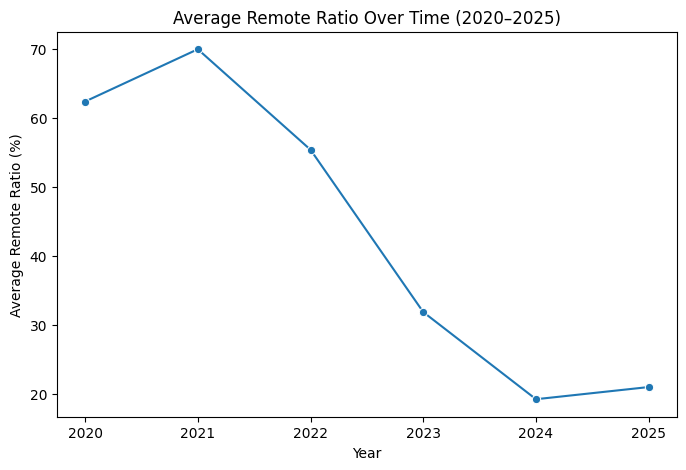

In [21]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='year', y='remote_ratio', estimator='mean', ci=None, marker='o')
plt.title('Average Remote Ratio Over Time (2020–2025)')
plt.xlabel('Year')
plt.ylabel('Average Remote Ratio (%)')
plt.show()


You’ll likely see a sharp rise in remote work from 2020–2022, then stabilization — aligning with global post-pandemic hybrid adoption.

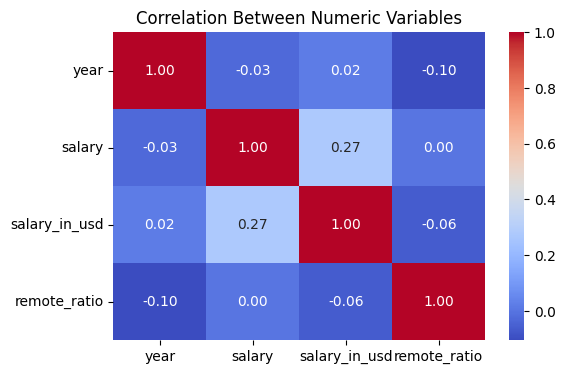

In [22]:
plt.figure(figsize=(6,4))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numeric Variables')
plt.show()


You’ll likely see:

Positive correlation between experience and salary

Mild correlation between company size and salary

Near-zero correlation between remote ratio and salary (indirect effect captured via job type instead)

In [23]:
#model implementation
features = [
    'year', 'seniority_level', 'status', 'job_title',
    'company_size', 'work_setting', 'employee_residence'
]
target = 'salary_in_usd'
df_model = df[features + [target]].copy()

# Fill missing and clean text data
df_model = df_model.fillna('Unknown')
for col in df_model.select_dtypes('object').columns:
    df_model[col] = df_model[col].astype(str).str.strip().str.title()

In [25]:
from sklearn.model_selection import train_test_split
X = df_model.drop(columns=[target])
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (74292, 7) Test: (18573, 7)


In [26]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

categorical_cols = X.select_dtypes(include='object').columns.tolist()
numeric_cols = ['year']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ])


Linear Models

In [28]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import numpy as np

models = {
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.001),
    'ElasticNet': ElasticNet(alpha=0.001, l1_ratio=0.5)
}

results = {}

for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    results[name] = {
        'R2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
    }

results_df = pd.DataFrame(results).T
print("🔹 Regularized Linear Models Performance:\n")
print(results_df)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.058e+14, tolerance: 3.353e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.001e+14, tolerance: 3.353e+10
  model = cd_fast.enet_coordinate_descent(


🔹 Regularized Linear Models Performance:

                  R2           MAE          RMSE
Ridge       0.325841  43134.285687  55071.632495
Lasso       0.325926  43140.046163  55068.171375
ElasticNet  0.323037  43221.623523  55186.038436


In [29]:
#non-linear models
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

nonlinear_models = {
    'RandomForest': RandomForestRegressor(n_estimators=200, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=8, random_state=42)
}

for name, model in nonlinear_models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    results[name] = {
        'R2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
    }

results_df = pd.DataFrame(results).T
print("\n🌲 Linear vs Non-Linear Model Comparison:\n")
print(results_df)



🌲 Linear vs Non-Linear Model Comparison:

                    R2           MAE          RMSE
Ridge         0.325841  43134.285687  55071.632495
Lasso         0.325926  43140.046163  55068.171375
ElasticNet    0.323037  43221.623523  55186.038436
RandomForest  0.334317  42589.325671  54724.320379
XGBoost       0.340048  42467.574219  54488.271912


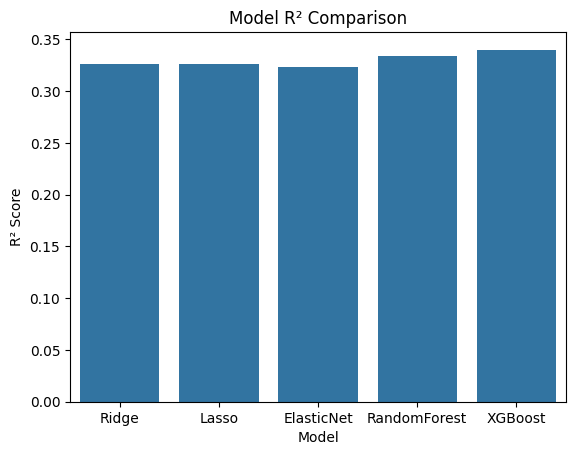

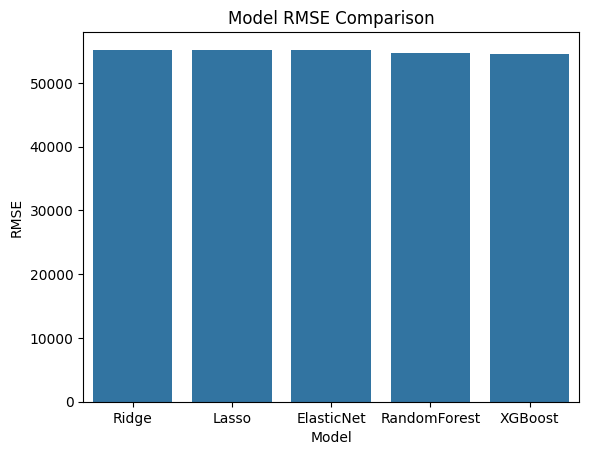

In [30]:
import matplotlib.pyplot as plt
sns.barplot(data=results_df.reset_index(), x='index', y='R2')
plt.title('Model R² Comparison')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.show()

sns.barplot(data=results_df.reset_index(), x='index', y='RMSE')
plt.title('Model RMSE Comparison')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.058e+14, tolerance: 3.353e+10
  model = cd_fast.enet_coordinate_descent(


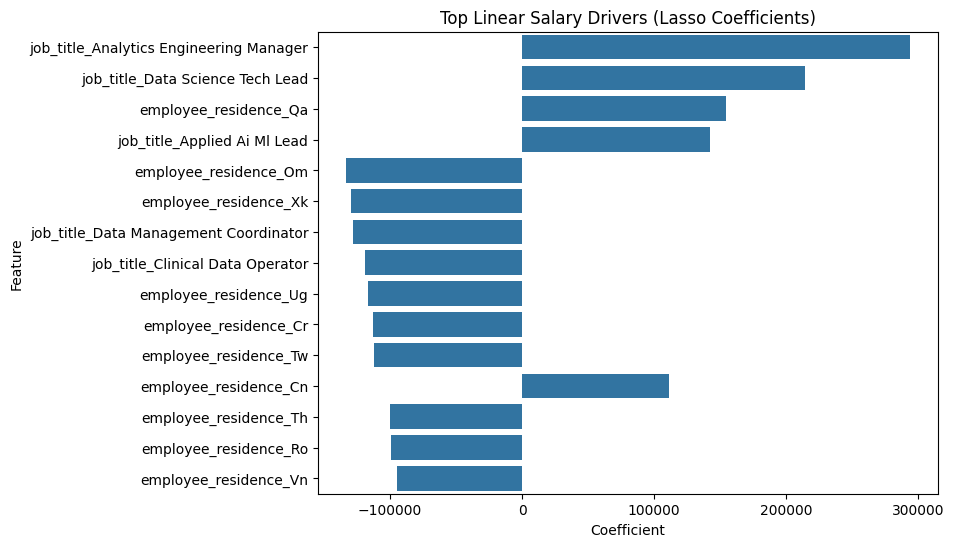

In [31]:
#feature importance analysis LASSO
lasso_model = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', Lasso(alpha=0.001))])
lasso_model.fit(X_train, y_train)

# Extract feature names
encoded_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
feature_names = np.concatenate([numeric_cols, encoded_cols])

coef = lasso_model.named_steps['model'].coef_
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coef})
top_linear = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index).head(15)

plt.figure(figsize=(8,6))
sns.barplot(data=top_linear, x='Coefficient', y='Feature')
plt.title('Top Linear Salary Drivers (Lasso Coefficients)')
plt.show()


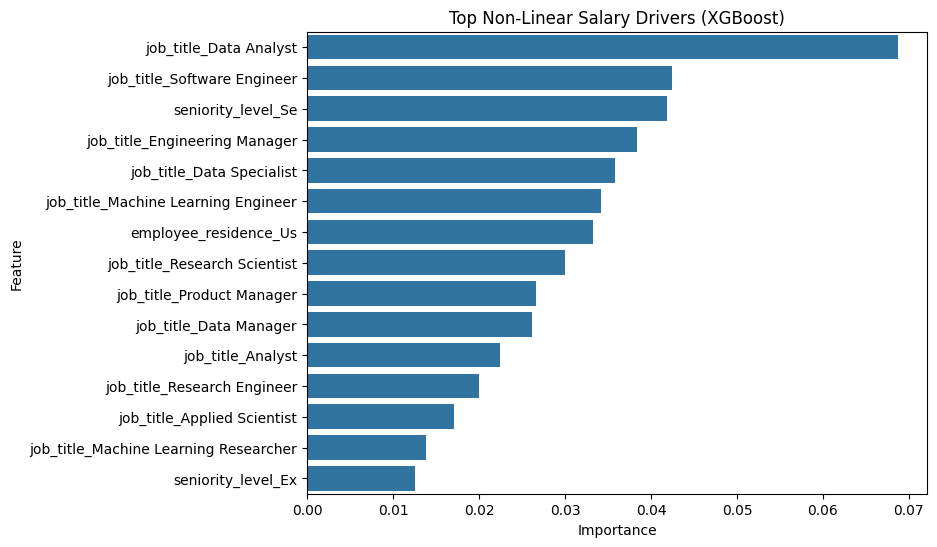

In [32]:
#feature importance analysis XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=8, random_state=42)
xgb_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', xgb_model)])
xgb_pipe.fit(X_train, y_train)

importances = xgb_pipe.named_steps['model'].feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
top_nonlinear = importance_df.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(8,6))
sns.barplot(data=top_nonlinear, x='Importance', y='Feature')
plt.title('Top Non-Linear Salary Drivers (XGBoost)')
plt.show()
